In [1]:
import pandas as pd
from pandas import DataFrame, Series
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
DATA_PATH = '/'

In [2]:
car_mpg = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

car_mpg['mpg']
car_mpg.mpg
car_mpg.iloc[0,:]

car_mpg.to_csv(f'{DATA_PATH}car_mpg.csv', index=False)
car_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [3]:
for col in list(car_mpg)[:-1]:
    v = int(car_mpg[col].mean())
    car_mpg[col] = car_mpg[col].fillna(v)
car_mpg['company'] = car_mpg.car_name.str.split(expand=True)[0].values
car_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,company
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu,chevrolet
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320,buick
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite,plymouth
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst,amc
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino,ford
...,...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl,ford
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup,vw
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage,dodge
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger,ford


# car_mpg_preprocessed.csv -> biến car_mpg

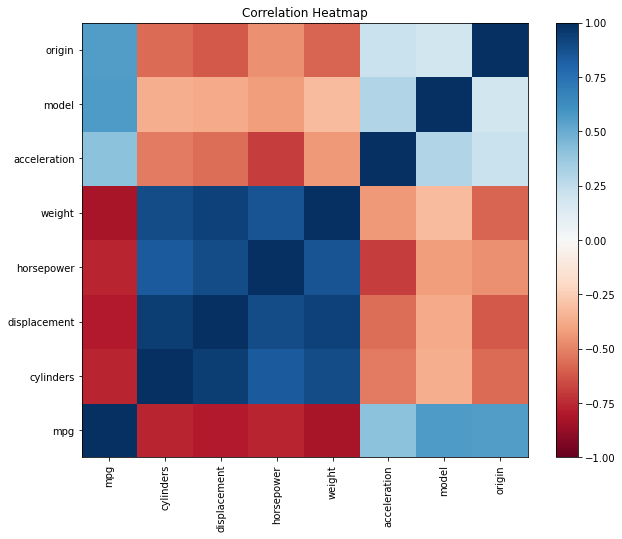

In [14]:
# car_mpg.iloc[:,0:8].corr()

plt.figure(figsize =(10,8))

plt.pcolor(car_mpg.iloc[:,0:8].corr(), cmap='RdBu', vmin=-1, vmax=1)

plt.yticks(np.arange(8) + 0.5, list(car_mpg)[:8])
plt.xticks(np.arange(8) + 0.5, list(car_mpg)[:8], rotation=90)
plt.colorbar()
plt.title('Correlation Heatmap')

plt.show()

Nhận xét:
- Ta có thể thấy sự tương quan thuận cao giữa các thông số cơ khí với nhau (cylinders, displacement, horsepower, weight), những thông số này đại diện cho phân khúc, công suất của từng chiếc xe.
- Thông số mpg tương quan nghịch cao với các thông số cơ khí trên thể hiện nếu xe càng mạnh, phân khúc càng cao thì sẽ càng tiêu hao nhiên liệu (mpg thấp).
- Thông số mpg tương quan thuận với model và origin thể hiện đời xe càng cao thì càng tiết kiệm nhiên liệu.
- Thông số acceleration tương quan nghịch với các thông số cơ khí trên thể hiện nếu xe càng to, công suất cao thì khả năng tăng tốc sẽ yếu.